**Problem Statement**

The task at hand involves evaluating the eligibility of individuals for a credit line by analyzing their specific attributes. The goal is to determine whether extending a loan is advisable for each individual and, if so, to formulate suitable repayment terms within business recommendations. The core challenge is to assess the financial feasibility of individuals meeting their repayment obligations. This requires making informed decisions based on the provided attributes to optimize the extension of credit lines and ensure favorable outcomes in terms of repayments.

**Step 1 : Read Data**

In [1]:
# !pip install scikit-learn==1.4.0

In [2]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn.preprocessing import TargetEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv("/content/drive/MyDrive/logistic_regression.csv")

In [4]:
# data = pd.read_csv("/content/logistic_regression.csv")

In [5]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


**Step 2 : Basic EDA**

In [6]:
# 1.Employee Title Doesn't make any sense to the model implementation.
# 2.We can keep only sub_grade and remove grade, since it represents more granular version of grade.
# 3.We can keep purpose column and remove title column, since both represents same.
# 4.Address field also doesn't make any sense to model. so, we can remove it.

In [7]:
data.groupby(['grade', 'loan_status']).size()

grade  loan_status
A      Charged Off      4036
       Fully Paid      60151
B      Charged Off     14587
       Fully Paid     101431
C      Charged Off     22449
       Fully Paid      83538
D      Charged Off     18338
       Fully Paid      45186
E      Charged Off     11765
       Fully Paid      19723
F      Charged Off      5037
       Fully Paid       6735
G      Charged Off      1461
       Fully Paid       1593
dtype: int64

In [8]:
data.shape

(396030, 27)

In [9]:
data = data.drop(columns=["emp_title","grade","title","address"])

In [10]:
# Shape of data after unncessary columns removal
data.shape

(396030, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [12]:
data.corr()

<ipython-input-12-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Changing Datatype of Catrgorical columns**

In [13]:
cat_columns = data.select_dtypes(['object']).columns
print("Categorical columns - ",cat_columns)
for col in cat_columns:
    data[col] = data[col].astype('category')

Categorical columns -  Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')


In [14]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**Univariate Analysis**

In [15]:
# Target column
data["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [16]:
# loan_status column should be encoded with 0 & 1.
# 1 - being fully paid
# 0 - being charged off
data = data.replace({'loan_status': {'Fully Paid': 1, 'Charged Off': 0}})

In [17]:
data["loan_status"].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [18]:
data["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [19]:
data["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [20]:
data["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [21]:
# We can replace experience with only numerical values.
data = data.replace({'emp_length': {'< 1 year': 1, '1 year': 1,'2 years': 2,'3 years': 3,'4 years': 4,'5 years': 5,'6 years': 6,'7 years': 7,'8 years': 8,'9 years': 9,'10+ years': 10}})

In [22]:
data["emp_length"].value_counts()

10    126041
1      57607
2      35827
3      31665
5      26495
4      23952
6      20841
7      20819
8      19168
9      15314
Name: emp_length, dtype: int64

In [23]:
data["sub_grade"].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [24]:
data["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [25]:
data = data.replace({'term': {' 36 months': 36, ' 60 months': 60}})

In [26]:
data["term"].value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [27]:
data["verification_status"].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [28]:
data = data.replace({'verification_status': {'Source Verified': 1,'Verified':1,'Not Verified':0}})

In [29]:
data["verification_status"].value_counts()

1    270948
0    125082
Name: verification_status, dtype: int64

In [30]:
data["issue_d"].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
Jul-2015    10270
Oct-2013    10047
Jan-2014     9705
Apr-2015     9470
Sep-2013     9179
Aug-2013     9112
Apr-2014     9020
Nov-2014     8858
May-2014     8840
Jul-2013     8631
Oct-2015     8401
May-2015     8325
Mar-2014     8108
Jun-2013     7947
Aug-2014     7860
Feb-2014     7624
Jun-2014     7610
May-2013     7567
Mar-2015     7268
Feb-2015     7167
Aug-2015     7153
Apr-2013     6970
Jun-2015     6844
Dec-2015     6407
Mar-2013     6187
Mar-2016     5945
Nov-2015     5835
Feb-2013     5693
Sep-2015     5419
Jan-2013     5215
Nov-2012     4910
Oct-2012     4833
Sep-2012     4707
Dec-2012     4571
Feb-2016     4336
Sep-2014     4293
Aug-2012     4220
Jan-2016     4133
Jul-2012     3576
Dec-2014     3487
Apr-2016     3027
Jun-2012     2936
May-2012     2644
Apr-2012     2508
Mar-2012     2256
Jun-2016     2152
May-2016     2082
Jan-2012     2050
Feb-2012     1991
Jul-2016     1851
Dec-2011  

In [31]:
# Convert above values into month and year columns - new features
# Function to convert month to number
def month_to_num(month_str):
    datetime_obj = pd.to_datetime(month_str, format='%b-%Y')
    return datetime_obj.month

data['issued_month'] = data['issue_d'].apply(month_to_num)
# Extract the year to create 'Year' column
data['issued_year'] = data['issue_d'].apply(lambda x: x.split('-')[1])

In [32]:
data["issued_month"].value_counts()

10    42130
7     39714
1     34682
11    34068
4     33223
8     32816
3     31919
5     31895
6     30140
12    29082
2     28742
9     27619
Name: issued_month, dtype: int64

In [33]:
data["issued_year"].value_counts()

2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: issued_year, dtype: int64

In [34]:
# So, we can drop issue_d column
data = data.drop(columns=["issue_d"])

In [35]:
data["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [36]:
data["earliest_cr_line"].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
Oct-1999    2726
Nov-1999    2700
Sep-2000    2691
Oct-2002    2640
Aug-2002    2599
Sep-2001    2565
Aug-1999    2548
Sep-2002    2530
Sep-1999    2530
Dec-2000    2508
Sep-2003    2491
Dec-1999    2479
Oct-2003    2439
Nov-2001    2432
Dec-2001    2423
Jul-2001    2416
Jul-2000    2369
May-2001    2334
Jan-2001    2334
Dec-1998    2329
Mar-2001    2325
Oct-1998    2306
Jun-2001    2304
Nov-1998    2286
Sep-2004    2277
Mar-2000    2269
Aug-2003    2269
May-2000    2257
Sep-1998    2231
Jun-2000    2229
Feb-2000    2175
Jan-2000    2167
Aug-1998    2149
Nov-2002    2145
Jul-2002    2137
Jul-2003    2125
Jan-2002    2114
Apr-2001    2107
Jul-1999    2076
Feb-2001    2063
Nov-2003    2032
Jun-1999    2027
Oct-2004    2026
May-2002    2022
Apr-2000    2013
Mar-2002    2007
Apr-2002    1995
Aug-2004    1969
Feb-2002    1958
Dec-1997    1949
May-1999    1944
Mar-1999    1931
Nov-1997    1918
Oct-1997    19

In [37]:
# Convert above values into month and year columns - new features
# Function to convert month to number
data['earliest_cr_line_month'] = data['earliest_cr_line'].apply(month_to_num)
# Extract the year to create 'Year' column
data['earliest_cr_line_year'] = data['earliest_cr_line'].apply(lambda x: x.split('-')[1])

In [38]:
data["earliest_cr_line_year"].value_counts()
data["earliest_cr_line_month"].value_counts()

10    38291
9     37673
8     37349
11    35583
12    33687
7     31972
3     31617
1     30694
6     30445
5     30445
4     29231
2     29043
Name: earliest_cr_line_month, dtype: int64

In [39]:
data = data.drop(columns=["earliest_cr_line"])

In [40]:
data["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   loan_amnt               396030 non-null  float64 
 1   term                    396030 non-null  category
 2   int_rate                396030 non-null  float64 
 3   installment             396030 non-null  float64 
 4   sub_grade               396030 non-null  category
 5   emp_length              377729 non-null  category
 6   home_ownership          396030 non-null  category
 7   annual_inc              396030 non-null  float64 
 8   verification_status     396030 non-null  category
 9   loan_status             396030 non-null  category
 10  purpose                 396030 non-null  category
 11  dti                     396030 non-null  float64 
 12  open_acc                396030 non-null  float64 
 13  pub_rec                 396030 non-null  float64 
 14  revo

In [42]:
data["issued_year"] = data["issued_year"].astype(int)
data["earliest_cr_line_year"] = data["earliest_cr_line_year"].astype(int)
data["loan_status"] = data["loan_status"].astype(int)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   loan_amnt               396030 non-null  float64 
 1   term                    396030 non-null  category
 2   int_rate                396030 non-null  float64 
 3   installment             396030 non-null  float64 
 4   sub_grade               396030 non-null  category
 5   emp_length              377729 non-null  category
 6   home_ownership          396030 non-null  category
 7   annual_inc              396030 non-null  float64 
 8   verification_status     396030 non-null  category
 9   loan_status             396030 non-null  int64   
 10  purpose                 396030 non-null  category
 11  dti                     396030 non-null  float64 
 12  open_acc                396030 non-null  float64 
 13  pub_rec                 396030 non-null  float64 
 14  revo

In [44]:
# for above 8 categorical columns, we can apply target encoding
X_Categorical = data[["term","sub_grade","emp_length","home_ownership","verification_status","purpose","initial_list_status","application_type"]]
y = data["loan_status"]
enc_auto = TargetEncoder()
encoded_data = enc_auto.fit_transform(X_Categorical, y)

In [45]:
encoded_df = pd.DataFrame(encoded_data,columns=["term","sub_grade","emp_length","home_ownership","verification_status","purpose","initial_list_status","application_type"])

In [46]:
# After target encoded the categorical columns looks below
encoded_df.head()

,term,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,0.842599,0.861251,0.816558,0.773648,0.853880,0.811000,0.798964,0.803923
1,0.842599,0.842785,0.808315,0.830338,0.853880,0.792499,0.807124,0.803923
2,0.842306,0.875628,0.797045,0.773775,0.780703,0.833009,0.806784,0.803915
3,0.842290,0.951836,0.813190,0.772475,0.854223,0.833308,0.806570,0.803898
4,0.681026,0.753091,0.799203,0.831290,0.780572,0.833308,0.806570,0.803898


In [47]:
encoded_df.head()

,term,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,0.842599,0.861251,0.816558,0.773648,0.853880,0.811000,0.798964,0.803923
1,0.842599,0.842785,0.808315,0.830338,0.853880,0.792499,0.807124,0.803923
2,0.842306,0.875628,0.797045,0.773775,0.780703,0.833009,0.806784,0.803915
3,0.842290,0.951836,0.813190,0.772475,0.854223,0.833308,0.806570,0.803898
4,0.681026,0.753091,0.799203,0.831290,0.780572,0.833308,0.806570,0.803898


In [48]:
numeric_df = data.drop(columns =["term","sub_grade","emp_length","home_ownership","verification_status","purpose","initial_list_status","application_type"] )
final_df = pd.concat([numeric_df, encoded_df], axis=1)
final_df.head()

# So, now everything converted into numerical form

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issued_month,issued_year,earliest_cr_line_month,earliest_cr_line_year,term,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,2015,6,1990,0.842599,0.861251,0.816558,0.773648,0.853880,0.811000,0.798964,0.803923
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,2015,7,2004,0.842599,0.842785,0.808315,0.830338,0.853880,0.792499,0.807124,0.803923
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,2015,8,2007,0.842306,0.875628,0.797045,0.773775,0.780703,0.833009,0.806784,0.803915
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,11,2014,9,2006,0.842290,0.951836,0.813190,0.772475,0.854223,0.833308,0.806570,0.803898
4,24375.0,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,4,2013,3,1999,0.681026,0.753091,0.799203,0.831290,0.780572,0.833308,0.806570,0.803898


In [49]:
# Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

# 1. Pub_rec
# 2. Mort_acc
# 3. Pub_rec_bankruptcies

final_df["pub_rec"] = final_df["pub_rec"].apply(lambda x:1 if x>1.0 else 0)
final_df["mort_acc"] = final_df["mort_acc"].apply(lambda x:1 if x>1.0 else 0)
final_df["pub_rec_bankruptcies"] = final_df["pub_rec_bankruptcies"].apply(lambda x:1 if x>1.0 else 0)


In [50]:
final_df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issued_month,issued_year,earliest_cr_line_month,earliest_cr_line_year,term,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0,36369.0,41.8,25.0,0,0,1,2015,6,1990,0.842599,0.861251,0.816558,0.773648,0.853880,0.811000,0.798964,0.803923
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0,20131.0,53.3,27.0,1,0,1,2015,7,2004,0.842599,0.842785,0.808315,0.830338,0.853880,0.792499,0.807124,0.803923
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0,11987.0,92.2,26.0,0,0,1,2015,8,2007,0.842306,0.875628,0.797045,0.773775,0.780703,0.833009,0.806784,0.803915
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,0,5472.0,21.5,13.0,0,0,11,2014,9,2006,0.842290,0.951836,0.813190,0.772475,0.854223,0.833308,0.806570,0.803898
4,24375.0,17.27,609.33,55000.0,0,33.95,13.0,0,24584.0,69.8,43.0,0,0,4,2013,3,1999,0.681026,0.753091,0.799203,0.831290,0.780572,0.833308,0.806570,0.803898


In [51]:
final_df.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
annual_inc                  0
loan_status                 0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
mort_acc                    0
pub_rec_bankruptcies        0
issued_month                0
issued_year                 0
earliest_cr_line_month      0
earliest_cr_line_year       0
term                        0
sub_grade                   0
emp_length                  0
home_ownership              0
verification_status         0
purpose                     0
initial_list_status         0
application_type            0
dtype: int64

In [52]:
final_df.shape

(396030, 25)

In [53]:
# revol_util column is the only column which has the null values. since the count of null value rows is very less (0.06%) we can remove those records.
final_df = final_df.dropna()

In [54]:
X = final_df.drop(columns=["loan_status"])
y = final_df["loan_status"]

In [55]:
final_df.shape

(395754, 25)

In [56]:
final_df.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issued_month,issued_year,earliest_cr_line_month,earliest_cr_line_year,term,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
count,395754.000000,395754.000000,395754.000000,3.957540e+05,395754.000000,395754.000000,395754.000000,395754.000000,3.957540e+05,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000,395754.000000
mean,14116.140709,13.637963,431.910951,7.419430e+04,0.803893,17.381739,11.315886,0.020260,1.584889e+04,53.791749,25.418467,0.399041,0.005875,6.553233,2013.629411,6.755987,1997.857816,0.803867,0.803927,0.803872,0.803872,0.803872,0.803873,0.803870,0.803871
std,8356.242580,4.472019,250.687300,6.162359e+04,0.397051,18.023880,5.135697,0.140889,2.058217e+04,24.452193,11.886773,0.489702,0.076422,3.426648,1.481305,3.435030,7.199213,0.068794,0.104711,0.018714,0.027222,0.033818,0.023614,0.003782,0.004882
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,1.000000,2007.000000,1.000000,1944.000000,0.679632,0.470582,0.723350,0.731416,0.780572,0.701365,0.798658,0.633852
25%,8000.000000,10.490000,250.330000,4.500000e+04,1.000000,11.290000,8.000000,0.000000,6.034000e+03,35.800000,17.000000,0.000000,0.000000,4.000000,2013.000000,4.000000,1994.000000,0.841921,0.735502,0.800691,0.773648,0.780703,0.792499,0.799476,0.803911
50%,12000.000000,13.330000,375.430000,6.400000e+04,1.000000,16.910000,10.000000,0.000000,1.118750e+04,54.800000,24.000000,0.000000,0.000000,7.000000,2014.000000,7.000000,1999.000000,0.842155,0.825161,0.807095,0.829954,0.781093,0.792590,0.806570,0.803915
75%,20000.000000,16.490000,567.455000,9.000000e+04,1.000000,22.980000,14.000000,0.000000,1.962400e+04,72.900000,32.000000,1.000000,0.000000,10.000000,2015.000000,10.000000,2003.000000,0.842306,0.889654,0.815449,0.830338,0.853279,0.832409,0.806890,0.803917
max,40000.000000,30.990000,1533.810000,8.706582e+06,1.000000,9999.000000,90.000000,1.000000,1.743266e+06,892.300000,151.000000,1.000000,1.000000,12.000000,2016.000000,12.000000,2013.000000,0.842599,0.971804,0.816558,1.000000,0.854223,0.887558,0.807333,0.880800


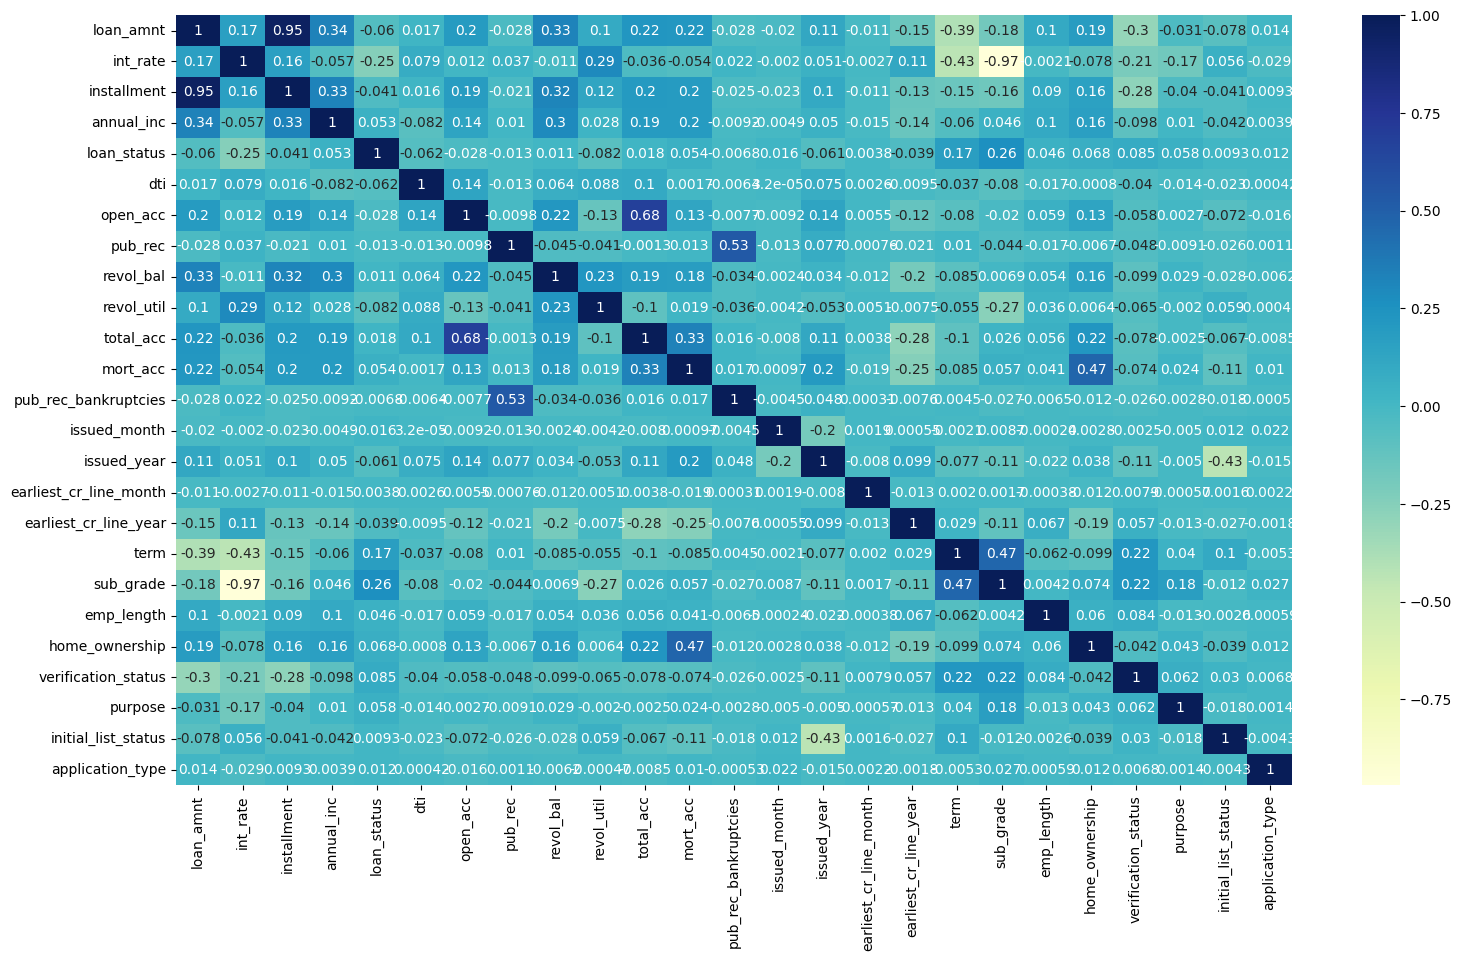

In [57]:
fig, ax = mp.subplots(figsize=(18,10))
dataplot = sns.heatmap(final_df.corr(), cmap="YlGnBu", annot=True,ax=ax)
# displaying heatmap
mp.show()

# Based on the heatmap, highly correlated features of target variable - sub_grade,term,int_rate,etc..

In [58]:
numeric_df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issued_month,issued_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,2015,6,1990
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,2015,7,2004
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,2015,8,2007
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,11,2014,9,2006
4,24375.0,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,4,2013,3,1999


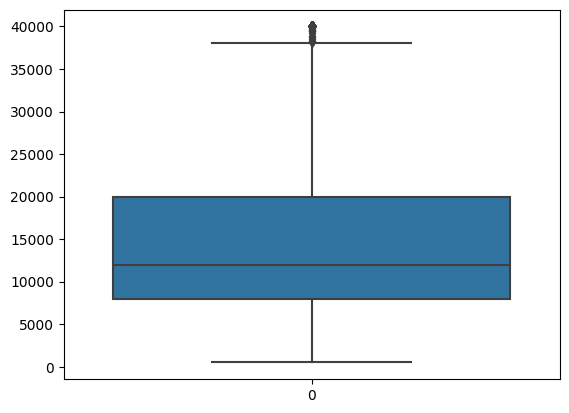

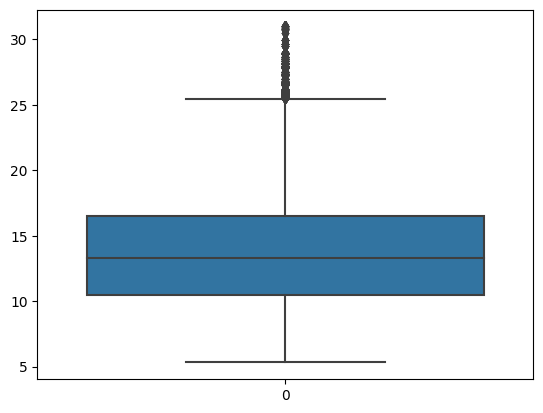

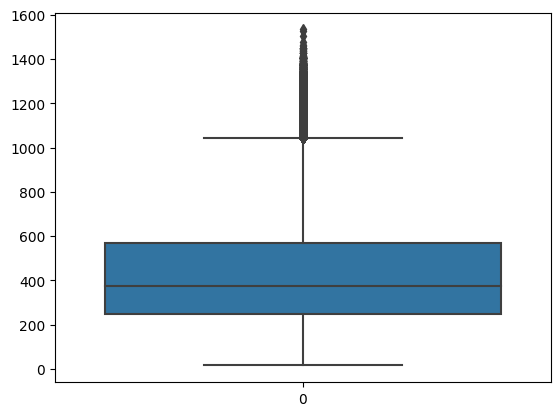

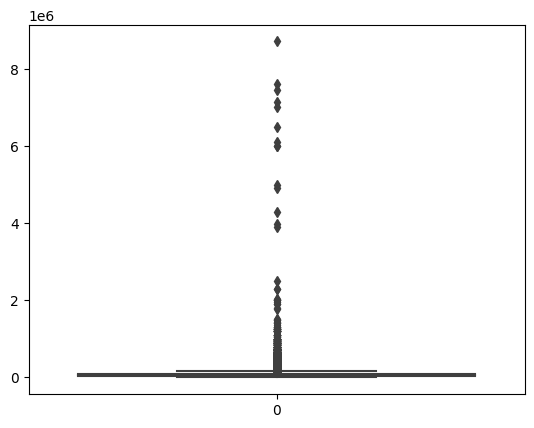

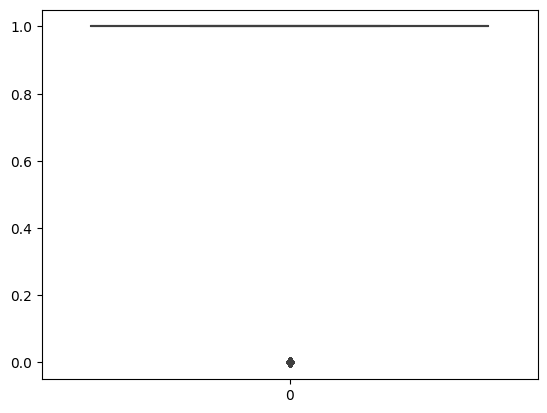

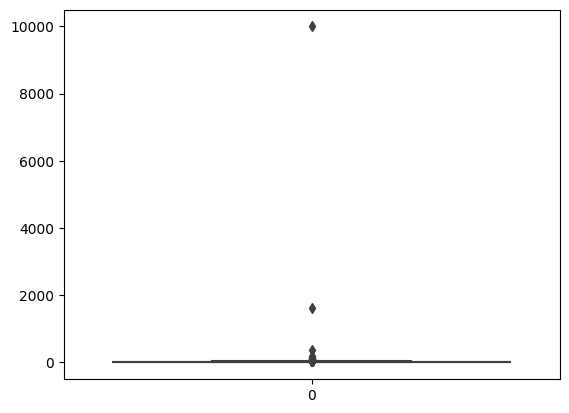

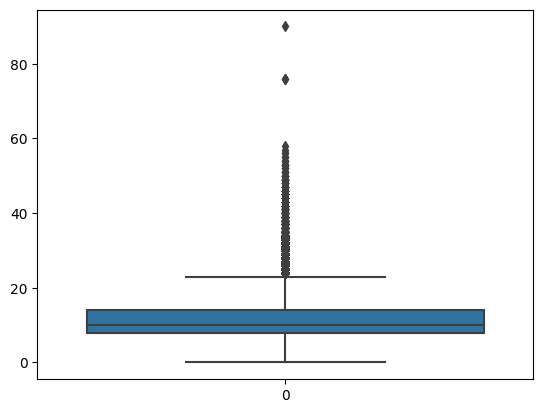

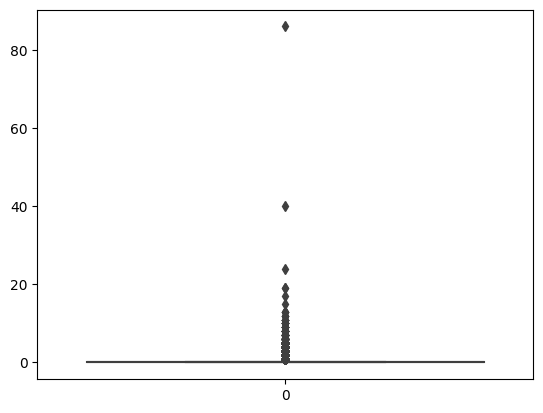

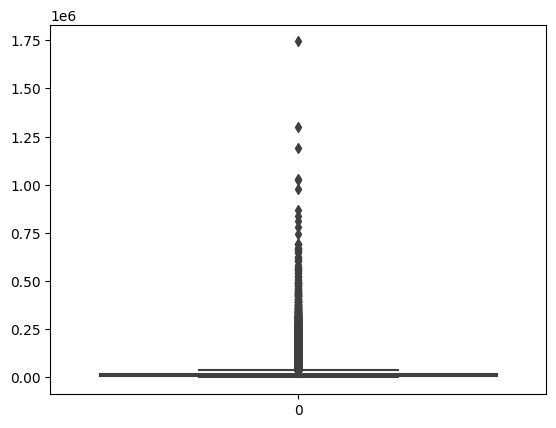

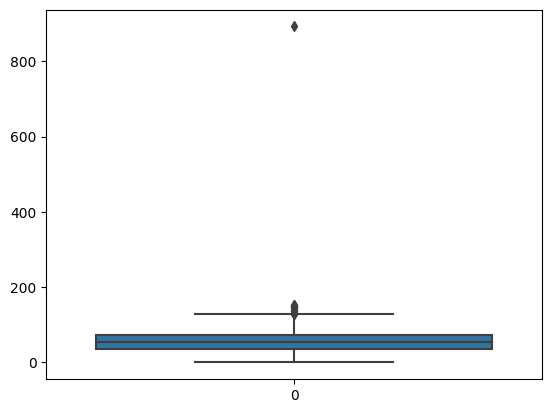

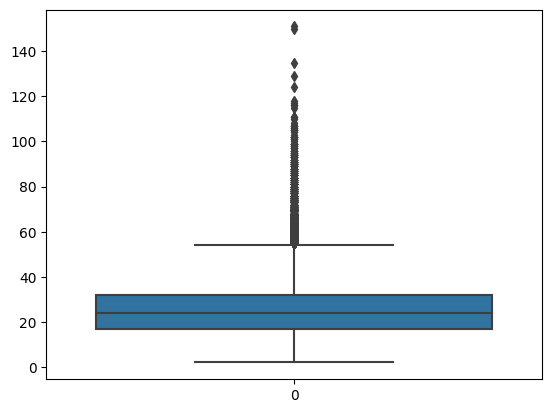

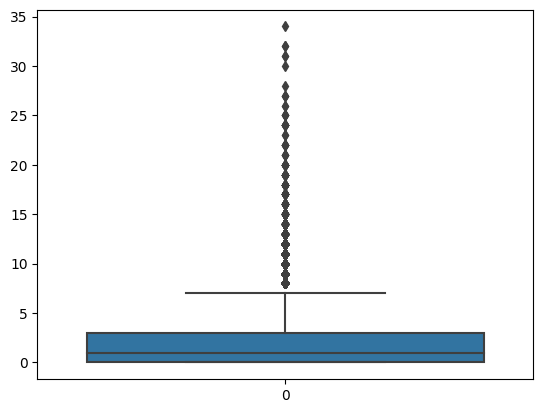

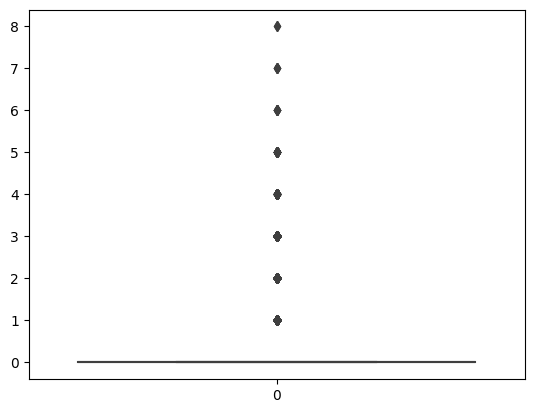

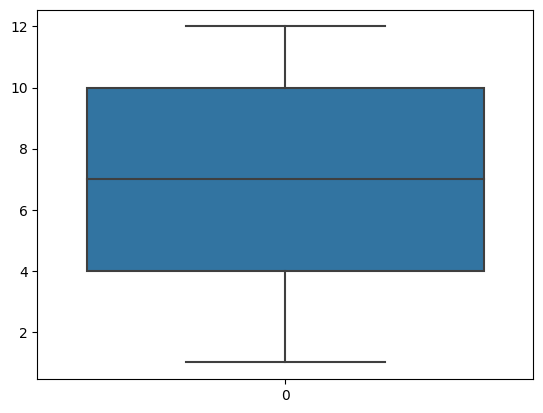

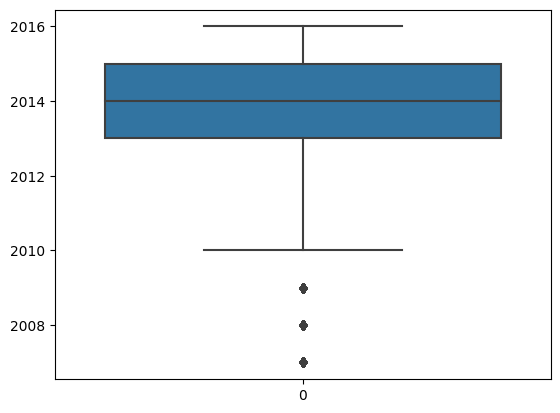

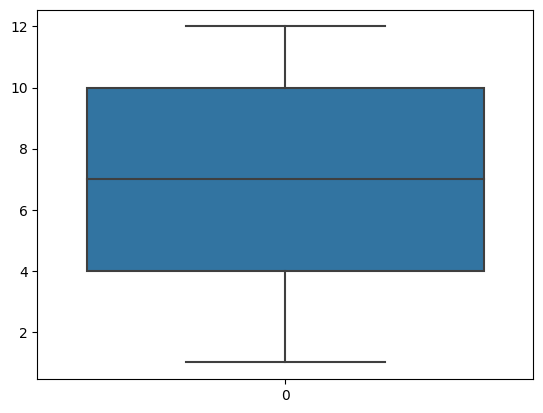

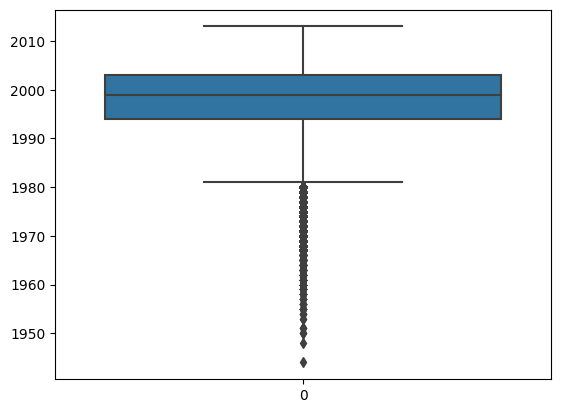

In [59]:
# Outlier check
for col in numeric_df.columns:
  box_plot = sns.boxplot(numeric_df[col])
  mp.show(box_plot)

# Most of the plotted outliers are expected in our usecase, these are not exactly the outliers.

In [60]:
#Min-Max Scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_train)

In [62]:
model = LogisticRegression()
model.fit(scaled_data,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
print(model.coef_, model.intercept_)

[[ 9.06411113e-01  7.53597766e-01 -1.16567535e+00  7.32655928e+00
  -1.60391658e+00 -2.14285683e+00 -4.01974994e-03  3.34117794e+00
  -4.38474675e+00  1.19460927e+00  1.45600143e-01 -1.81066159e-01
   2.69496969e-02 -6.94769639e-01  3.53421246e-02  6.43621667e-02
   5.76892967e-01  2.79972572e+00  6.00964269e-01  1.17822288e+00
   1.07725076e-01  4.67392787e-01 -7.01596289e-02  9.31408334e-01]] [-2.06240789]


In [64]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_test)
y_pred = model.predict(scaled_data)

In [65]:
y_pred[:100]

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [66]:
accuracy_score(y_test,y_pred)

0.6922940864335829

In [67]:
test = pd.DataFrame(y_pred,columns=["pred"])

In [68]:
test["pred"].value_counts()

1    82560
0    36167
Name: pred, dtype: int64

In [69]:
report = classification_report(y_test, y_pred, output_dict=True)

In [70]:
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.315481,0.492107,0.384479,23186.000000
1,0.857364,0.740876,0.794875,95541.000000
accuracy,0.692294,0.692294,0.692294,0.692294
macro avg,0.586423,0.616491,0.589677,118727.000000
weighted avg,0.751541,0.692294,0.714729,118727.000000


In [71]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score,roc_curve,confusion_matrix

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Reall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))
print('ROC-AUC: ', roc_auc_score(y_test, y_pred))

Accuracy:  0.6922940864335829
Reall:  0.7408756450110424
Precision:  0.8573643410852713
F1-score:  0.7948748182211217
ROC-AUC:  0.6164914755720268


In [72]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[11410, 11776],
       [24757, 70784]])

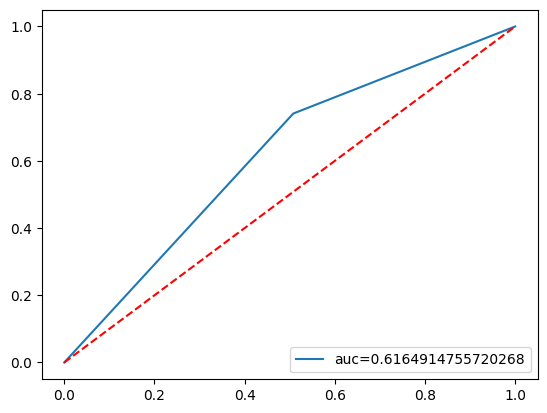

In [73]:
fpr, tpr, _ = roc_curve(y_test,   y_pred)
auc = roc_auc_score(y_test, y_pred)
mp.plot(fpr,tpr,label="auc="+str(auc))
mp.plot([0, 1], [0, 1],'r--')
mp.legend(loc=4)
mp.show()

**Classification Metrics Understanding**

For our usecase, we need to reduce both FP and FN cases, as both are sensitive to the business point of view.
So, we need to increase both precision and recall and also to increase the ROC AUC score.


Due to time constraints, I couldn't try RFE,VIF techniques for feature selection.
Also,I could have tried probability cut off tuning for specific threshold value to get better model precision,accuracy and recall

**Questions**

**1.What percentage of customers have fully paid their Loan Amount?**

In [74]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issued_month,issued_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,B4,10,RENT,117000.0,0,1,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1,2015,6,1990
1,8000.0,36,11.99,265.68,B5,4,MORTGAGE,65000.0,0,1,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,1,2015,7,2004
2,15600.0,36,10.49,506.97,B3,1,RENT,43057.0,1,1,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,1,2015,8,2007
3,7200.0,36,6.49,220.65,A2,6,RENT,54000.0,0,1,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,11,2014,9,2006
4,24375.0,60,17.27,609.33,C5,9,MORTGAGE,55000.0,1,0,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,4,2013,3,1999


In [75]:
data["loan_status"].value_counts(normalize=True)

1    0.803871
0    0.196129
Name: loan_status, dtype: float64

**Ans: 80.38%**

**2.Comment about the correlation between Loan Amount and Installment features.**

In [76]:
data.corr()

<ipython-input-76-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issued_month,issued_year,earliest_cr_line_month,earliest_cr_line_year
loan_amnt,1.000000,0.168921,0.953929,0.336887,-0.059836,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,-0.020332,0.115067,-0.010636,-0.147003
int_rate,0.168921,1.000000,0.162758,-0.056771,-0.247758,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,-0.002053,0.050386,-0.002673,0.108470
installment,0.953929,0.162758,1.000000,0.330381,-0.041082,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,-0.023279,0.103490,-0.010785,-0.131848
annual_inc,0.336887,-0.056771,0.330381,1.000000,0.053432,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,-0.004875,0.050033,-0.014712,-0.140456
loan_status,-0.059836,-0.247758,-0.041082,0.053432,1.000000,-0.062413,-0.028012,-0.019933,0.010892,-0.082373,0.017893,0.073111,-0.009383,0.016368,-0.060502,0.003861,-0.038928
dti,0.016636,0.079038,0.015786,-0.081685,-0.062413,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.000059,0.074847,0.002524,-0.009479
open_acc,0.198556,0.011649,0.188973,0.136150,-0.028012,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,-0.009093,0.137584,0.005477,-0.123538
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.019933,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.023474,0.128452,-0.003983,-0.053268
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.010892,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,-0.002452,0.034400,-0.012220,-0.199152
revol_util,0.099911,0.293659,0.123915,0.027871,-0.082373,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.004213,-0.053086,0.005083,-0.007452


**Ans: Loan amount and installment feature has high positive correlation- with correlation values as 0.953929**

**3.The majority of people have home ownership as _______.**

In [77]:
data["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**Ans: MORTGAGE**

**4.People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

**Ans:False. Grade B is the more likely to pay their loan**

**5.Name the top 2 afforded job titles.**

**6.Thinking from a bank's perspective, which metric should our primary focus be on..
1.ROC AUC
2.Precision
3.Recall
4.F1 Score**

**Ans: For our usecase, we need to reduce both FP and FN cases, as both are sensitive to the business point of view. So, we need to increase both precision and recall and also to increase the ROC AUC score. When both precision and recall needs to be increased we need harmonic mean of the both(f1-score)as well**

**7.How does the gap in precision and recall affect the bank?**

Ans: Precision represented as TP/(TP+FP), Out of all the cases which are predicted as 1 and how many of them actually one.

Recall is represented as TP/(TP+FN) ,How well my model is predicting +ve out of all +ve cases.

If Precision is low, then more number of FP cases are there. It leads to actual is 0 and predicting it as 1. So, if bank give loan then the individual may not repay the loan amount.

If Recall is low, then more number of FN cases are there.It leads to actual is 1 and predicting it as 0. So, If bank refuse to give loan based on the prediction, then bank will lose the profit/customer.

**8.Which were the features that heavily affected the outcome?**

In [78]:
print(model.coef_, model.intercept_)

[[ 9.06411113e-01  7.53597766e-01 -1.16567535e+00  7.32655928e+00
  -1.60391658e+00 -2.14285683e+00 -4.01974994e-03  3.34117794e+00
  -4.38474675e+00  1.19460927e+00  1.45600143e-01 -1.81066159e-01
   2.69496969e-02 -6.94769639e-01  3.53421246e-02  6.43621667e-02
   5.76892967e-01  2.79972572e+00  6.00964269e-01  1.17822288e+00
   1.07725076e-01  4.67392787e-01 -7.01596289e-02  9.31408334e-01]] [-2.06240789]


In [79]:
X_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issued_month,issued_year,earliest_cr_line_month,earliest_cr_line_year,term,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
84695,2400.0,12.99,80.86,40000.0,15.27,10.0,0,4841.0,46.1,12.0,0,0,11,2014,5,2002,0.842155,0.802422,0.815885,0.773344,0.853279,0.792590,0.806890,0.803911
265920,12000.0,12.35,400.59,95000.0,7.28,12.0,0,19403.0,37.5,21.0,1,0,7,2013,11,2000,0.842599,0.861251,0.807856,0.830338,0.780882,0.792499,0.798964,0.803923
370939,3500.0,15.80,122.71,49000.0,15.65,7.0,0,1080.0,28.4,24.0,0,0,4,2013,12,2000,0.842290,0.781783,0.800339,0.772475,0.854223,0.792280,0.806570,0.803898
357773,12000.0,16.89,427.18,75000.0,6.54,9.0,0,8495.0,48.3,16.0,0,0,6,2011,12,1988,0.842599,0.691492,0.816558,0.773648,0.853880,0.792499,0.807124,0.803923
279128,8000.0,6.03,243.49,45000.0,0.67,8.0,0,249.0,0.7,23.0,1,0,6,2013,11,1996,0.842290,0.971115,0.815449,0.831290,0.854223,0.831372,0.799799,0.803898


In [80]:
import numpy as np
sorted_arr = np.sort(model.coef_)[::-1]

In [81]:
sorted_arr

array([[-4.38474675e+00, -2.14285683e+00, -1.60391658e+00,
        -1.16567535e+00, -6.94769639e-01, -1.81066159e-01,
        -7.01596289e-02, -4.01974994e-03,  2.69496969e-02,
         3.53421246e-02,  6.43621667e-02,  1.07725076e-01,
         1.45600143e-01,  4.67392787e-01,  5.76892967e-01,
         6.00964269e-01,  7.53597766e-01,  9.06411113e-01,
         9.31408334e-01,  1.17822288e+00,  1.19460927e+00,
         2.79972572e+00,  3.34117794e+00,  7.32655928e+00]])

**Ans: Top 3 weighted features : Annual income weight - 7.77,revol_bal weight - 3.60,sub_grade - 2.65**

**9.Will the results be affected by geographical location? (Yes/No)**

**TradeOff Questions**

**1.How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**

**Ans : We need to increase the precision to reduce the false +ves**

**2.Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**

**Ans: Yes, we can keep threshold value more than 0.5 /based on the probability cut-off threshold, to reduce the FP and increase the precision.**